### Loading the Trained Fraud Detection Model and Unseen Test Data


In [1]:
# Import necessary libraries
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the model correctly
with open('fraud_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Step 2: Load the test data
test_data = pd.read_csv('Unseen_data.csv')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:13:44] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


### Making Predictions on Unseen Test Data and Analyzing Results

In [2]:
# Making Predictions on Unseen Test Data and Analyzing Results

# Step 1: Generate predictions
predictions = model.predict(test_data)

# Step 2: Display the predictions
print(predictions)

# Step 3: View the first 10 predictions
print(predictions[:10])

# Step 4: Check predicted class distribution
print(pd.Series(predictions).value_counts())

# Step 5: Add predictions as a new column in test data
test_data['prediction'] = predictions
print(test_data.head())


[0 0 0 ... 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
0    116768
1      1340
Name: count, dtype: int64
   ProductCD  card3  V15  V17  V23  V31  V37  V38  V39  V40  ...  V230  V242  \
0        4.0  150.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  ...   1.0   1.0   
1        0.0  185.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
2        4.0  150.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  ...   1.0   1.0   
3        4.0  150.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  ...   1.0   1.0   
4        4.0  150.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  ...   1.0   1.0   

   V243  V246  V247  V257  V258  V302  V303  prediction  
0   1.0   1.0   1.0   1.0   1.0   0.0   0.0           0  
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0           0  
2   1.0   1.0   1.0   1.0   1.0   0.0   0.0           0  
3   1.0   1.0   1.0   1.0   1.0   0.0   0.0           0  
4   1.0   1.0   1.0   1.0   1.0   0.0   0.0           0  

[5 rows x 51 columns]


### Analyzing and Visualizing Fraud Predictions on Unseen Data


In [6]:
!pip install xgboost

📊 Total Transactions: 118108
⚠️ Fraud Transactions: 1340 (1.13%)
✅ Non-Fraud Transactions: 116768 (98.87%)


<ipython-input-3-4fb05ed6d06b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Fraud', 'Fraud'], y=[not_fraud_count, fraud_count], palette='viridis')


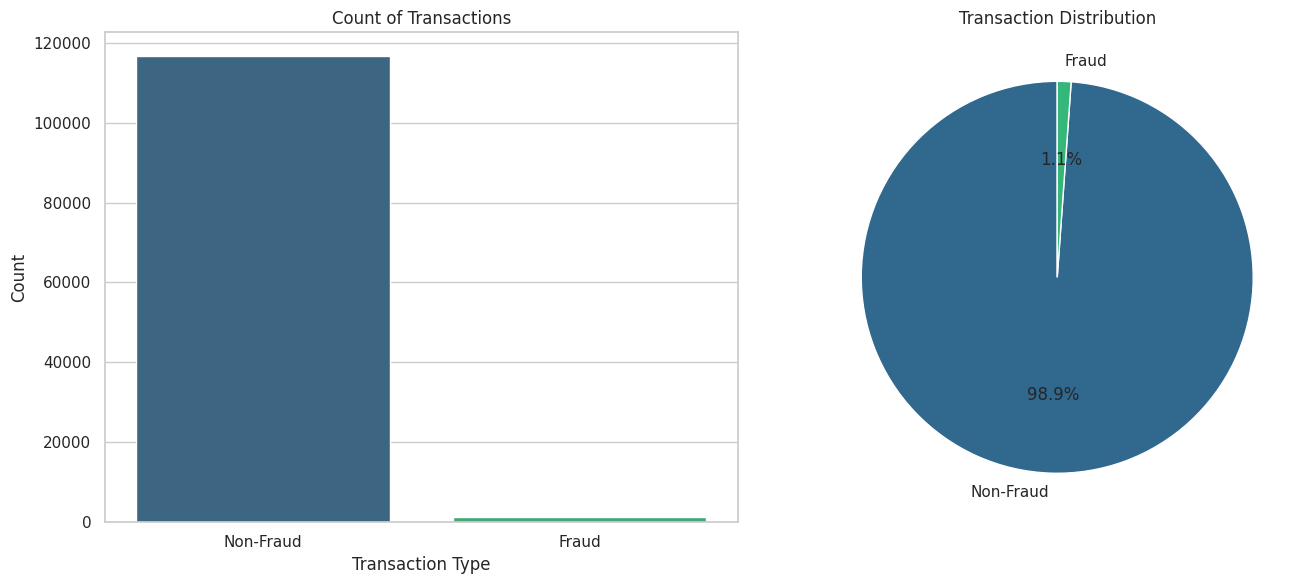

✅ Saved predictions to 'test_with_predictions.csv'


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Optional for styling
sns.set(style="whitegrid")

# Step 4: Add predictions to the data
# Drop the 'Prediction' column if it already exists to prevent duplicates
if 'Prediction' in test_data.columns:
    test_data.drop(columns=['Prediction'], inplace=True)

test_data['Prediction'] = predictions  # Add predictions to the test data

# Step 5: Dashboard elements - Stats Calculation
fraud_count = (test_data['Prediction'] == 1).sum()
not_fraud_count = (test_data['Prediction'] == 0).sum()
total_transactions = len(test_data)
fraud_percentage = (fraud_count / total_transactions) * 100
not_fraud_percentage = (not_fraud_count / total_transactions) * 100

# Display basic stats
print(f"📊 Total Transactions: {total_transactions}")
print(f"⚠️ Fraud Transactions: {fraud_count} ({fraud_percentage:.2f}%)")
print(f"✅ Non-Fraud Transactions: {not_fraud_count} ({not_fraud_percentage:.2f}%)")

# Step 6: Visualization
plt.figure(figsize=(14, 6))

# Bar Plot for transaction counts
plt.subplot(1, 2, 1)
sns.barplot(x=['Non-Fraud', 'Fraud'], y=[not_fraud_count, fraud_count], palette='viridis')
plt.title('Count of Transactions')
plt.ylabel('Count')
plt.xlabel('Transaction Type')

# Pie Chart for transaction distribution
plt.subplot(1, 2, 2)
plt.pie([not_fraud_count, fraud_count],
        labels=['Non-Fraud', 'Fraud'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('viridis', 2))
plt.title('Transaction Distribution')

plt.tight_layout()
plt.show()

# Step 7: Save the predictions to a CSV file
test_data.to_csv('test_with_predictions.csv', index=False)
print("✅ Saved predictions to 'test_with_predictions.csv'")


### Visualizing Feature Distributions for Fraud and Non-Fraud Predictions


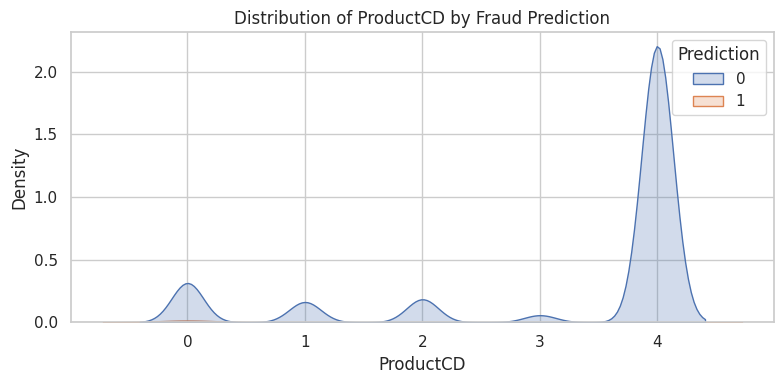

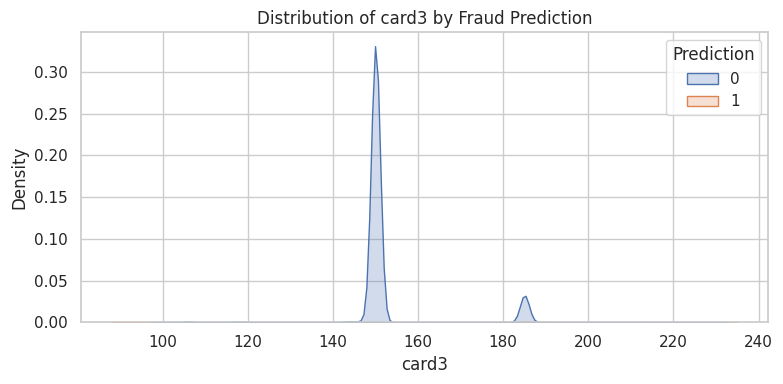

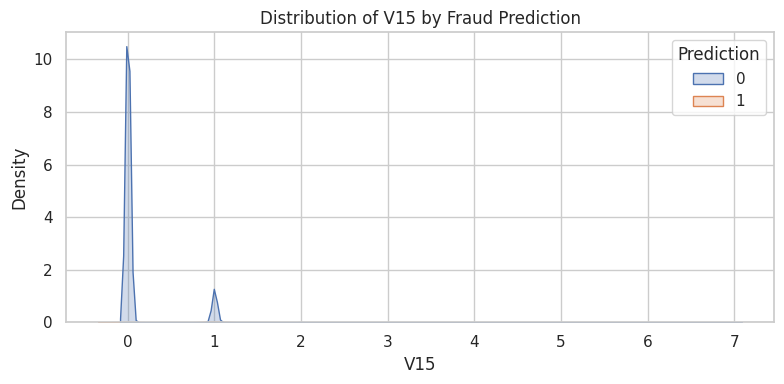

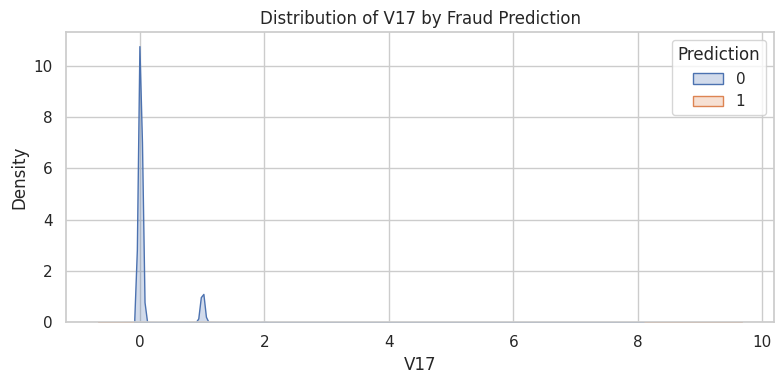

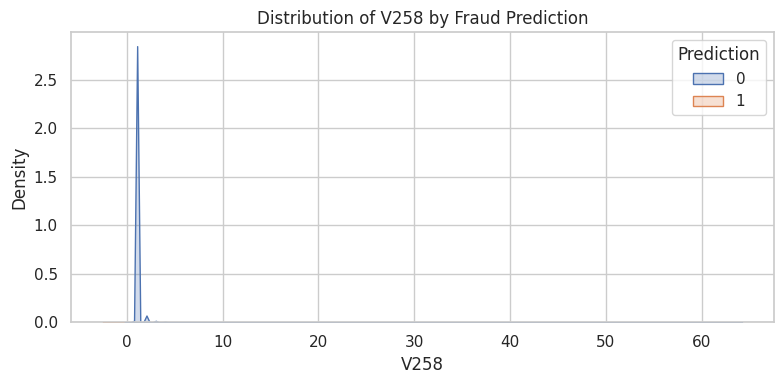

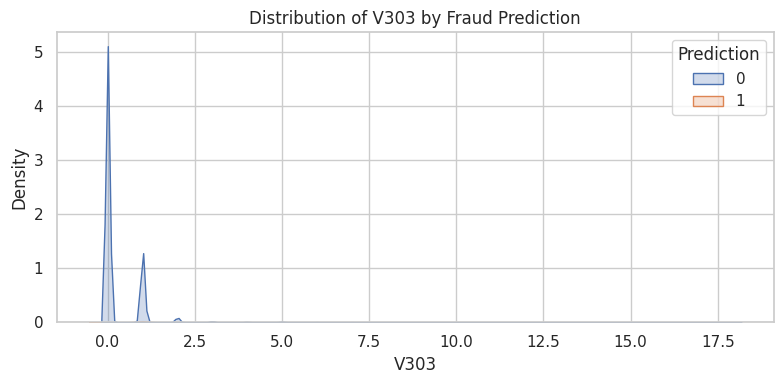

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use some relevant features from your list
important_cols = ['ProductCD', 'card3', 'V15', 'V17', 'V258', 'V303']

for col in important_cols:
    if col in test_data.columns:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(data=test_data, x=col, hue='Prediction', fill=True)
        plt.title(f'Distribution of {col} by Fraud Prediction')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.tight_layout()
        plt.show()


### Histogram of Predicted Fraud Probabilities

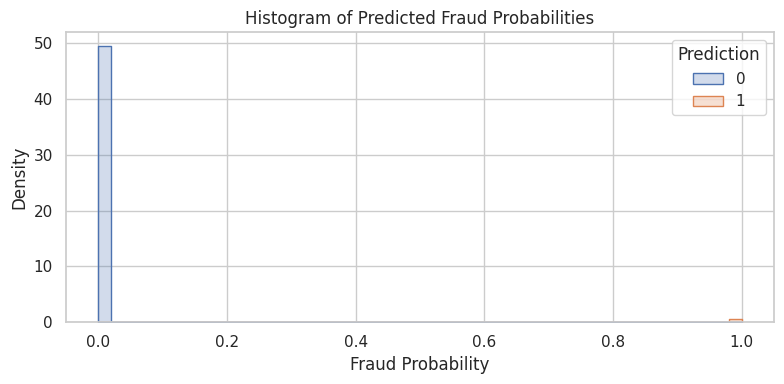

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(data=test_data, x='prediction', bins=50, hue='Prediction', element='step', stat='density')
plt.title('Histogram of Predicted Fraud Probabilities')
plt.xlabel('Fraud Probability')
plt.ylabel('Density')
plt.tight_layout()
plt.show()
